<a href="https://colab.research.google.com/github/costalferz/DSI206_Project/blob/main/DSI206_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Straighten Image of a Page With Python












# รายชื่อ

*   6309658059  นางสาวโชติมา ธนอัสนีกร
*   6309658307  นางสาวเพ็ญพิชชา ผูกพันธ์
*   6309658711  นางสาวอรอนงค์ อินยะวิน
*   6309659115  นายคณาธิป ภัทรพรพงศ์

#Requirement

In [ ]:
#@title Library ที่จะใช้
import os
import cv2
import numpy as np
from google.colab import files
from IPython.display import HTML
import matplotlib.pyplot as plt
import imutils
from PIL import Image, ImageDraw, ImageFont

# Step 1. Select and upload your image

Saving OjjrRAAAAAElFTkSuQmCC.png to OjjrRAAAAAElFTkSuQmCC.png


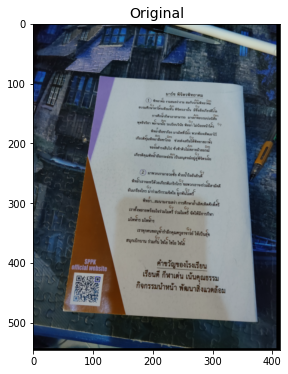

In [ ]:
#@เลือกรูปภาพ
#@markdown <h3> 🖼️ เลือกรูปภาพ Choose An Image</h3>
#@markdown <small>สามารถเลือกภาพตัวอย่างหรือจะอัพโหลดภาพของคุณ Pick the preset image or upload your own image</small>

image = '\uD83D\uDCE4 upload your image' #@param ['🗏 page', '🧾 receipt', '📤 upload your image']

image = ' '.join(image.split(' ')[1:])
onedrive_dataset = None

image_url = {
  'page': 'https://tuipied-my.sharepoint.com/:i:/g/personal/sarung_staff_tu_ac_th/EYrbOpH-4KxKh92HODIIu14BtZ-2t7tPW2BAqpK9cpCPwA?download=1',
  'receipt': 'https://tuipied-my.sharepoint.com/:i:/g/personal/sarung_staff_tu_ac_th/Eas6Z4A_v0JBr8r-AEgh8VQBeOoOWC2tdZtEPc_CJ3RPNw?download=1',
}

if image == 'upload your image': 
  onedrive_dataset = ':images_upload:'
elif image in image_url:  
  onedrive_dataset = image_url[image]
if onedrive_dataset == None: raise Exception('Cannot select image')

preupload_datasets = None
if onedrive_dataset == ':images_upload:':
  display(HTML('<h3>Select your image</h3>'))
  dir = os.getcwd()
  uploaded = files.upload()
  preupload_datasets = [os.path.join(dir, f) for f in uploaded.keys()]
  image_fn = preupload_datasets[0]
else:
  get_ipython().system_raw('wget -O image.jpg ' + onedrive_dataset)
  image_fn = 'image.jpg'
img = cv2.imread(image_fn)
plt.figure(figsize=(6, 6))
plt.imshow(img)


plt.title('Original' , fontsize='14')

plt.show()

# Step 2. Mirror and Rotate Image
ในกรณีที่รูปภาพมีการนำเข้ามาแบบสะท้อนหรือกลับด้าน คุณสามารถปรับรูปภาพได้ตามต้องการ โดยใช้ฟีเจอร์ ดังนี้

1.   Mirror Image
2.   Rotate Image



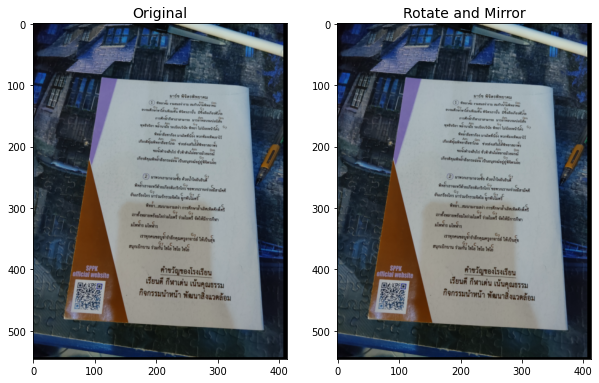

In [ ]:
#@title 
img = cv2.imread(image_fn)
AngleofRotation = "No change" #@param ["No change","90", "180", "270" ]
Mirror = "No" #@param ["No", "Yes"]
if AngleofRotation=="No change":
  imgrot = img
elif AngleofRotation == "90":
  imgrot = cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)
elif AngleofRotation == "180":
  imgrot = cv2.rotate(img,cv2.ROTATE_180)
elif AngleofRotation == "270":
  imgrot = cv2.rotate(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
if Mirror == "Yes":
  imgrot = cv2.flip(imgrot, 1)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original',fontsize='14')

plt.subplot(1,2,2)
plt.imshow(imgrot)
plt.title('Rotate and Mirror',fontsize='14')

plt.show()

# Step 3. Convert RGB to Gray image
เราจำเป็นต้องปรับสีของรูปภาพที่เรานำเข้ามา เพื่อให้โปรแกรมทำงานได้อย่างรวดเร็วและมีประสิทธิภาพ ดังนี้

1.   เปลี่ยนสีรูปภาพจาก BGR เป็น RGB
2.   เปลี่ยนสีรูปภาพจาก RGB เป็น Gray Scale



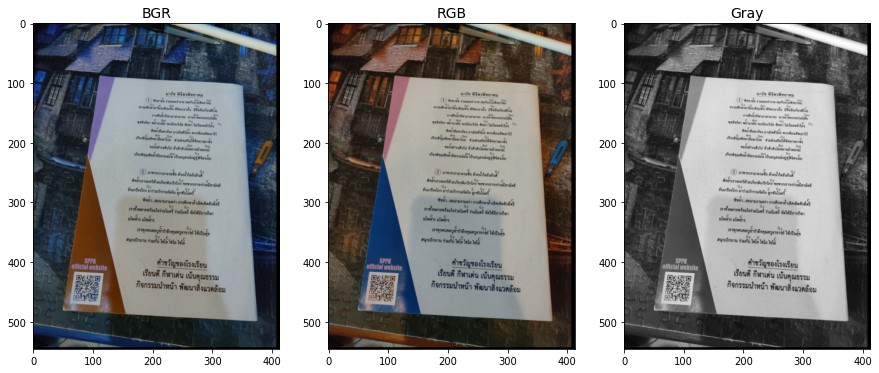

In [ ]:
#@title Covert to Gray image
height, width, channels = imgrot.shape
imgrgb = cv2.cvtColor(imgrot, cv2.COLOR_BGR2RGB) 
gray = cv2.cvtColor(imgrot, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(imgrot)
plt.title('BGR',fontsize='14')

plt.subplot(1,3,2)
plt.imshow(imgrgb)
plt.title('RGB',fontsize='14')

plt.subplot(1,3,3)
plt.imshow(gray,cmap='gray' )
plt.title('Gray',fontsize='14')

plt.show()

# Step 4. Denoise
Denoise รูปภาพเพื่อให้สามารถตรวจจับหา Edge และ  Contour ได้แม่นยำมากขึ้น ดังนี้
1. ปรับ kernel size ได้ตามต้องการ
2. ลด Noise ด้วยวิธี Morphology Operation 
3. ลด Noise ที่เหลือด้วย Gaussian Blur

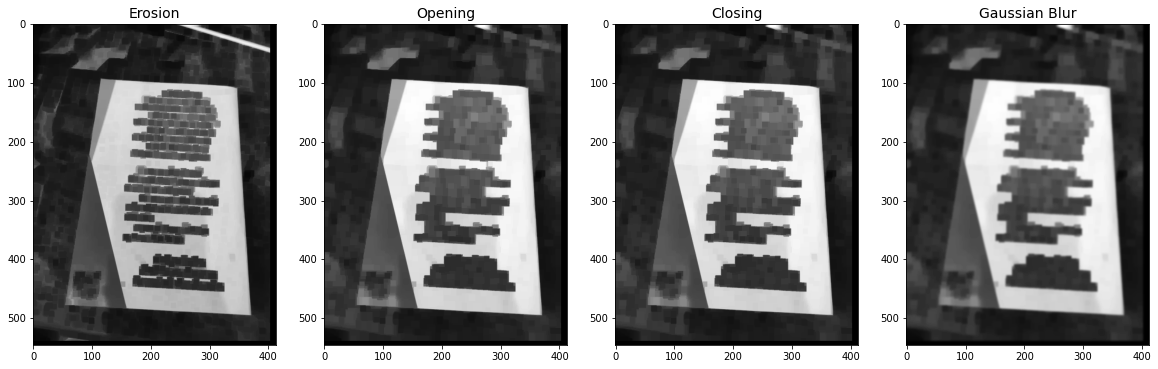

In [ ]:
#@title Morphology Operation and Gaussian Blur
ksize = 9 #@param {type:"slider", min:1, max:9, step:2}
kernel = np.ones((ksize , ksize), np.uint8) # Kernel
erosion = cv2.erode(gray, kernel, iterations=1)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

if ksize > 3:
  ksize = ksize-2
else:
  ksize = 1

blur_img = cv2.GaussianBlur(closing,(ksize,ksize),0)
plt.figure(figsize=(20, 20))

plt.subplot(1,4,1)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion',fontsize='14')

plt.subplot(1,4,2)
plt.imshow(opening , cmap='gray')
plt.title('Opening',fontsize='14')

plt.subplot(1,4,3)
plt.imshow(closing , cmap='gray')
plt.title('Closing',fontsize='14')

plt.subplot(1,4,4)
plt.imshow(blur_img, cmap='gray')
plt.title('Gaussian Blur',fontsize='14')

plt.show()

# Step 5. Identify the edges
ตรวจจับขอบของเอกสารโดยใช้
1. Canny Edge 
2. Adaptive Threshold 

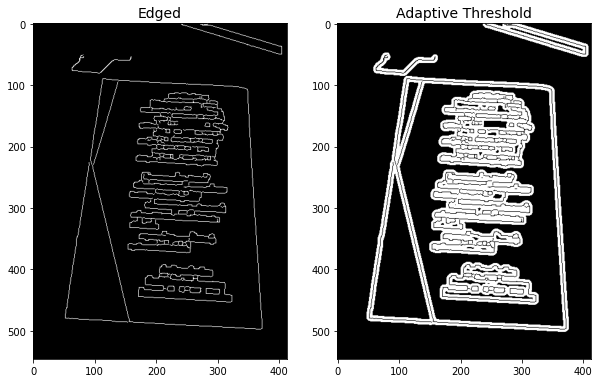

In [ ]:
#@title 

# Get Threshold Of Canny
edges = cv2.Canny(blur_img,30, 250) 

thresh = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY_INV, 11, 3)  
plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(edges , cmap="gray")
plt.title('Edged',fontsize='14')

plt.subplot(1,2,2)
plt.imshow(thresh , cmap="gray")
plt.title('Adaptive Threshold', fontsize='14')

plt.show()

# Step 6. Identify and extract document boundary/edges
หา Contour ของเอกสาร เมื่อหา Contour เจอแล้วจะแสดงเป็นเส้นรูปร่างสีเขียว

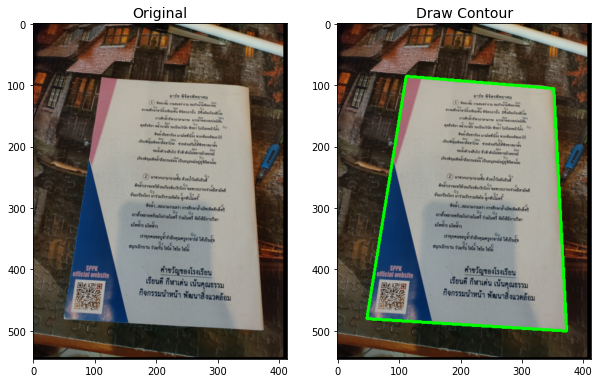

In [ ]:
#@title
contours = cv2.findContours(thresh , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
all_contours = imutils.grab_contours(contours)
all_contours = sorted(all_contours, key=cv2.contourArea, reverse=True)[:1]
contour_perimeter = cv2.arcLength(all_contours[0], True) 
approximated_poly = cv2.approxPolyDP(all_contours[0], 0.02 * contour_perimeter, True)

draw = cv2.drawContours(imgrgb.copy(), [approximated_poly], -1, (0,255,0), 4)

plt.figure(figsize=(10, 10))

plt.subplot(1,2,1)
plt.imshow(imgrgb)
plt.title('Original',fontsize='14')

plt.subplot(1,2,2)
plt.imshow(draw , cmap="gray")
plt.title('Draw Contour',fontsize='14')
plt.show()


# Step 7. Apply Perspective Transform
เปลี่ยนมุมมองของเอกสาร 
1. แปลงขนาด Contour เอกสาร ให้มีขนาดเป็น 4 จุด 
2. คำนวณหาขนาดของเอกสารที่ต้องการสแกน
3. ส่งค่าขนาดและพิกัดของเอกสารหลังจากนั้นก็เปลี่ยนแปลงมุมมอง


**กรณีที่โปรแกรมไม่สามารถหา 4 จุดได้ ให้ลองปรับค่า kernel ใหม่หรือใช้เอกสารอื่นในการสแกน

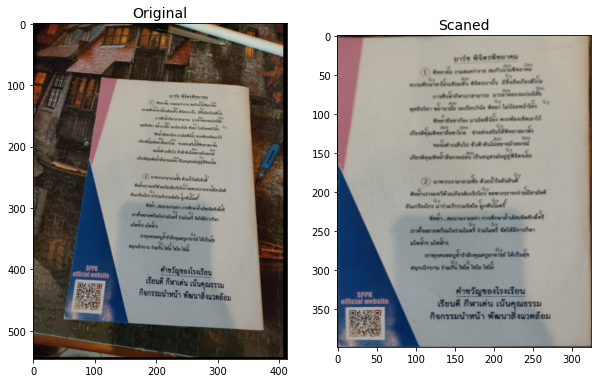

In [ ]:
#@title
try:
  approximated_poly = np.array(approximated_poly.reshape(4, 2))
  rectangle = np.zeros((4, 2), dtype="float32")
  (tl, tr, br, bl) = rectangle                
  s = np.sum(approximated_poly, axis=1)
  rectangle[0] = approximated_poly[np.argmin(s)]
  rectangle[2] = approximated_poly[np.argmax(s)]

  diff = np.diff(approximated_poly, axis=1)
  rectangle[1] = approximated_poly[np.argmin(diff)]
  rectangle[3] = approximated_poly[np.argmax(diff)]

    # Calculate width
  width_a = np.sqrt((tl[0] - tr[0])**2 + (tl[1] - tr[1])**2 )
  width_b = np.sqrt((bl[0] - br[0])**2 + (bl[1] - br[1])**2 )
  max_width = max(int(width_a), int(width_b))

    # Calculate height
  height_a = np.sqrt((tl[0] - bl[0])**2 + (tl[1] - bl[1])**2 )
  height_b = np.sqrt((tr[0] - br[0])**2 + (tr[1] - br[1])**2 )
  max_height = max(int(height_a), int(height_b))
  destinations = np.array([ 
        [0,0],                                  # Top left point
        [max_width - 1, 0],                     # Top right point
        [max_width - 1, max_height - 1],        # Bottom right point
        [0, max_height - 1]],                   # Bottom left point
        dtype="float32")                        # Data type
  transform_matrix = cv2.getPerspectiveTransform(rectangle, destinations)
  scan = cv2.warpPerspective(imgrgb, transform_matrix, (max_width, max_height))
  plt.figure(figsize=(10, 10))
  plt.subplot(1,2,1)
  plt.imshow(imgrgb)
  plt.title('Original', fontsize='14')

  plt.subplot(1,2,2)
  plt.imshow(scan)
  plt.title('Scaned',fontsize='14')

  plt.show()
except ValueError as rectangle:
  print("ไม่สามารถหา ขอบ 4 ด้านของเอกสารได้ ลองเปลี่ยนค่า Kernel อีกครั้งหนึ่งหรือลองใช้รูปเอกสารรูปอื่นดู")
except:
  print("รูปนี้ ไม่ได้สามารถหาขอบเอกสารได้ โปรดลองรูปเอกสารอื่นๆ")


# Step 8. Watermark
การเพิ่มลายน้ำในเอกสารตามที่คุณต้องการ 
1. ติดตั้ง Font ที่คุณต้องการ
2. แปลงรูปภาพให้โปรแกรมของเราอ่านรูปได้ 
3. ทำสำเนารูปภาพโดยการวาดภาพใหม่ 
4. ดึงขนาดของรูปภาพ เพื่อกำหนด Font และขนาดของข้อความ 
5. คำนวณหาตำแหน่งของลายน้ำ

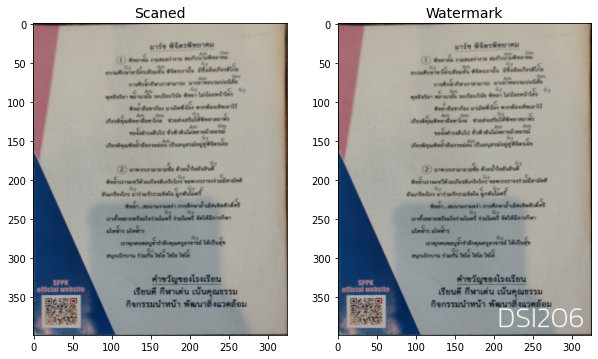

In [ ]:
#@title
!wget https://github.com/costalferz/DSI206_Project/raw/main/Kanit-ExtraLight.ttf --quiet


image_scan_watermark = Image.fromarray(scan)

draw_watermark = ImageDraw.Draw(image_scan_watermark)

text = "DSI206"
font = ImageFont.truetype('Kanit-ExtraLight.ttf', 36)
imgw, imgh = image_scan_watermark.size
textwidth, textheight = draw_watermark.textsize(text, font)

# calculate the x,y coordinates of the text
margin = 10
x = imgw - textwidth - margin
y = imgh - textheight - margin

# draw watermark in the bottom right corner
draw_watermark.text((x, y), text, font=font)

#Save Scanned image
Image.fromarray(scan).save('scan.jpg')

#Save watermarked image
image_scan_watermark.save('watermark.jpg')


plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(scan)
plt.title('Scaned', fontsize='14')

plt.subplot(1,2,2)
plt.imshow(image_scan_watermark)
plt.title('Watermark', fontsize='14')
plt.show()

#Conclusion

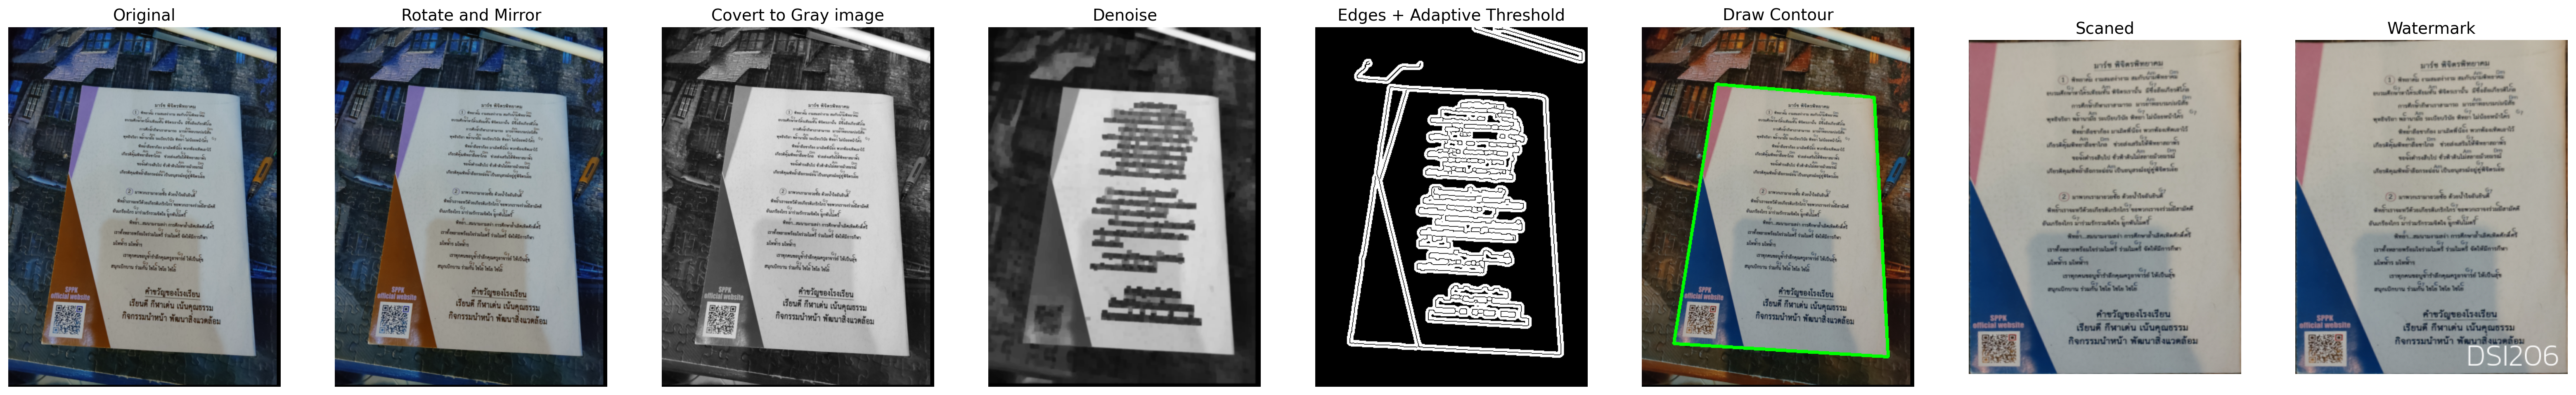

In [ ]:
#@title

plt.figure(figsize=(40, 20) ,  dpi=200)

plt.subplot(1,8,1)
plt.axis('off')
plt.imshow(img)
plt.title('Original', fontsize='14')

plt.subplot(1,8,2)
plt.axis('off')
plt.imshow(imgrot)
plt.title('Rotate and Mirror', fontsize='14')

plt.subplot(1,8,3)
plt.axis('off')
plt.imshow(gray,cmap='gray')
plt.title('Covert to Gray image', fontsize='14')

plt.subplot(1,8,4)
plt.axis('off')
plt.imshow(blur_img,cmap='gray')
plt.title('Denoise', fontsize='14')

plt.subplot(1,8,5)
plt.axis('off')
plt.imshow(thresh , cmap='gray')
plt.title('Edges + Adaptive Threshold', fontsize='14')

plt.subplot(1,8,6)
plt.axis('off')
plt.imshow(draw)
plt.title('Draw Contour', fontsize='14')

plt.subplot(1,8,7)
plt.axis('off')
plt.imshow(scan)
plt.title('Scaned', fontsize='14')

plt.subplot(1,8,8)
plt.axis('off')
plt.imshow(image_scan_watermark)
plt.title('Watermark', fontsize='14')

plt.show()